### EDA and Feature Engineering
### Cleaning and Preparing The Data For Model Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing the dataset
train_data = pd.read_csv("train.csv") 

In [3]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
test_data = pd.read_csv("test.csv")
test_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


# so this test_data I think is the data of some other users
 - we  cannot merge them because merge combines the data on the basis of values and here we want to add some  more rows not to fill  thee rows that are empty hence we will use some  method that will add this data below the previous data frame.
 - For this df1.append("df2")

In [7]:
combined_data = train_data.append(test_data)
combined_data.head()

C:\Users\walee\AppData\Local\Temp\ipykernel_13256\1444924079.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = train_data.append(test_data)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [9]:
combined_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


- now rows of test_data have been added below the rows of train_data

### We have observed that User_ID is useless colomn and  will  not be helpful in the Problem Statement, therefore we will drop this column from the data Frame

In [10]:
# Dropping the User_ID column
combined_data.drop(["User_ID"],axis=1,inplace=True)

In [11]:
combined_data.head(20)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
5,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227.0
6,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215.0
7,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854.0
8,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686.0
9,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871.0


### Notice that User_ID column has been dropped from tha df

- Handling the categorical features "Gender"
- pd.get_dummies(combined_data["column"]) 
- df["column"].map({"value1":0,"value2":1,.....})

In [12]:
# combined_data["Gender"] = pd.get_dummies(combined_data["Gender"]) 
# there is an other method to handle the categotival values and replace them wwith numerical values for the sake of modelling
combined_data["Gender"] = combined_data["Gender"].map({"F":1,"M":0})
combined_data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969.0


# Handling the Categorical column values "Age"

In [13]:
pd.get_dummies(combined_data["Age"])  # this is not the very best practice in this case

,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
233594,0,0,1,0,0,0,0
233595,0,0,1,0,0,0,0
233596,0,0,1,0,0,0,0
233597,0,0,0,0,1,0,0


- Notice that age groups are divided into 6 categories so we could also assume that or may be analyze that from around 0-17 and 55+ there will be less orders as compared to that of other age groups
- We could rank these age groups from 1-6 ascending age wise 

In [14]:
age_values = combined_data["Age"].unique()
age_values

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
age_values.sort()

In [16]:
age_values

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

- Notice that all the values in array have been sort , now we can map them easily in sorted order
# This is also called as label encoding

In [17]:
combined_data["Age"] = combined_data["Age"].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [18]:
combined_data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,7,16,C,4+,0,8,NaN,NaN,7969.0


## 2nd method of Label Encoding  (Google)

- Import label encoder    
    `from sklearn import preprocessing`
  
- label_encoder object knows 
- how to understand word labels.  
    `label_encoder = preprocessing.LabelEncoder()`
  
- Encode labels in column 'Age'.  
    `df['Age']= label_encoder.fit_transform(df['Age'])`  
    `df['Age'].unique()`

# label encoding another column df["City_Category"]

In [19]:
pd.get_dummies(combined_data["City_Category"])

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
233594,0,1,0
233595,0,1,0
233596,0,1,0
233597,0,0,1


In [20]:
pd.get_dummies(combined_data["City_Category"],drop_first=True)

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [21]:
City_Category_values = pd.get_dummies(combined_data["City_Category"],drop_first=True)

# Here we have drop the first as it might not be required and other will cover up

In [22]:
combined_data = pd.concat([combined_data,City_Category_values],axis=1)

In [23]:
combined_data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,0,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [24]:
# Now we donot require combined_data["City_Category"] so dropping that column
combined_data.drop("City_Category",axis=1,inplace=True)

In [25]:
combined_data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,1,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,1,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,1,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,1,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,0,7,16,4+,0,8,NaN,NaN,7969.0,0,1


<AxesSubplot:>

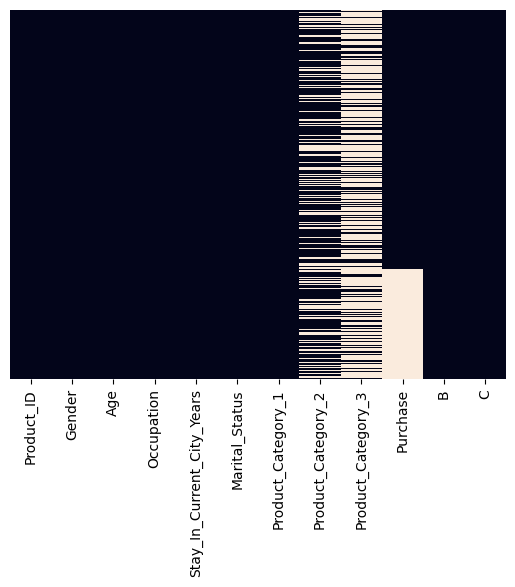

In [26]:
sns.heatmap(combined_data.isnull(),yticklabels=False,cbar=False)

In [27]:
combined_data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

## Handling the missing values from the data

In [28]:
combined_data["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

### sice all the values are dicrete not continous we will replcae those missing values with mode 

In [29]:
combined_data["Product_Category_2"].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [30]:
combined_data["Product_Category_2"].fillna(combined_data["Product_Category_2"].mode()[0],inplace=True)

In [31]:
combined_data["Product_Category_2"].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [32]:
combined_data["Product_Category_2"].mode()[0]

8.0

In [33]:
combined_data["Product_Category_2"].isnull().sum()

0

In [34]:
combined_data["Product_Category_2"].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [35]:
combined_data["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [36]:
# since they are discrete , therefore we will replace them by mode
combined_data["Product_Category_3"].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [37]:
combined_data["Product_Category_3"].fillna(combined_data["Product_Category_3"].mode()[0],inplace=True)

In [38]:
combined_data["Product_Category_3"].unique()

array([16., 14., 17.,  5.,  4., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

<AxesSubplot:>

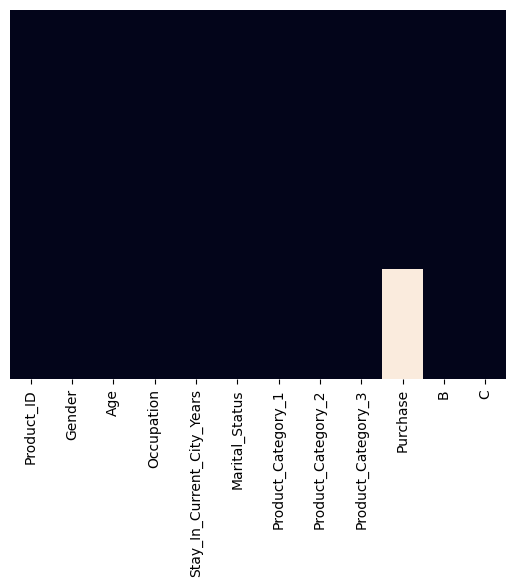

In [39]:
sns.heatmap(combined_data.isnull(),cbar=False,yticklabels=False)

In [40]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [41]:
combined_data["Stay_In_Current_City_Years"].unique()
# we can just replace 4+ by 4 here

array(['2', '4+', '3', '1', '0'], dtype=object)

In [42]:
combined_data["Stay_In_Current_City_Years"] = combined_data["Stay_In_Current_City_Years"].str.replace("+","")
combined_data["Stay_In_Current_City_Years"]

C:\Users\walee\AppData\Local\Temp\ipykernel_13256\3509418157.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  combined_data["Stay_In_Current_City_Years"] = combined_data["Stay_In_Current_City_Years"].str.replace("+","")


0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [43]:
combined_data["Stay_In_Current_City_Years"].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [44]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [45]:
combined_data["Stay_In_Current_City_Years"] = combined_data["Stay_In_Current_City_Years"].astype("int64")

In [46]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 67.3+ MB


In [47]:
city_category = ["B","C"]
for i in city_category:
    combined_data[i] = combined_data[i].astype("int")

In [48]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(2), int64(6), object(1)
memory usage: 71.7+ MB


In [49]:
combined_data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

C:\Users\walee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

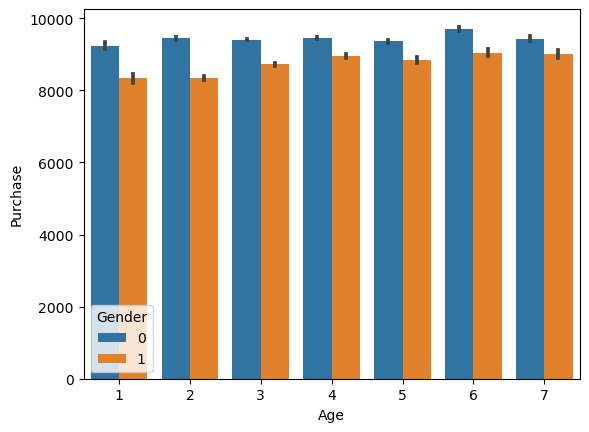

In [50]:
# visualizations
sns.barplot("Age","Purchase",hue="Gender",data=combined_data)

# Observation
- Male are doing more shopping then Females while the distribution among the different age group is same

C:\Users\walee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

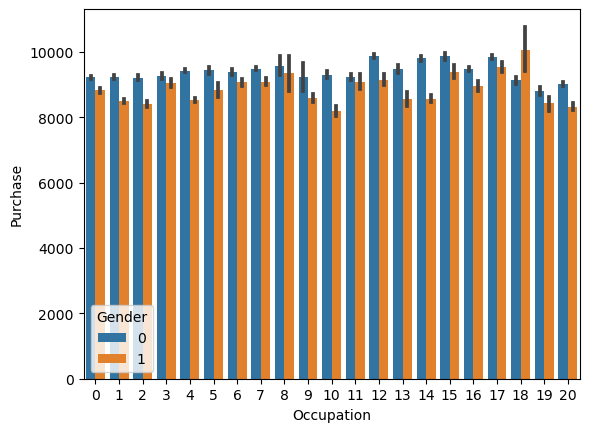

In [51]:
sns.barplot("Occupation","Purchase",hue="Gender",data=combined_data)

C:\Users\walee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

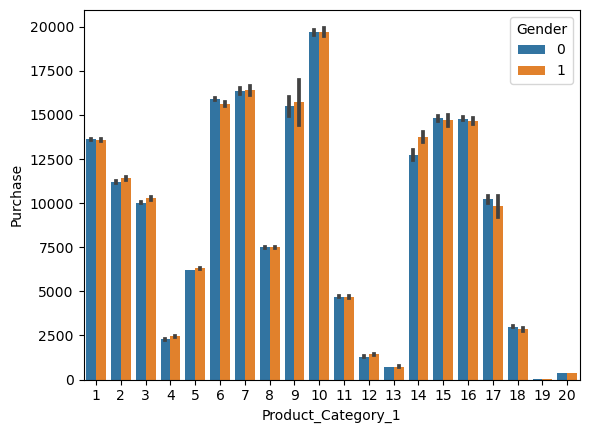

In [52]:
sns.barplot("Product_Category_1","Purchase",hue="Gender",data=combined_data)

C:\Users\walee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

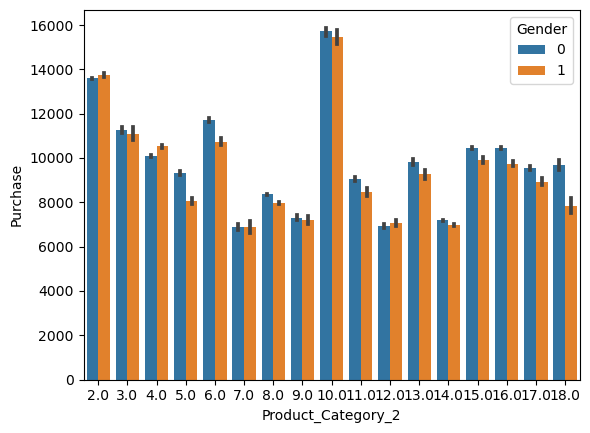

In [53]:
sns.barplot("Product_Category_2","Purchase",hue="Gender",data=combined_data)

In [54]:
combined_data["Product_Category_2"].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

C:\Users\walee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Age'>

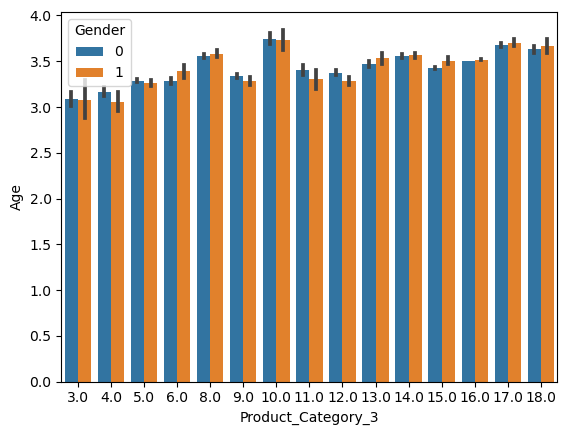

In [55]:
sns.barplot("Product_Category_3","Age",hue="Gender",data=combined_data)

## Feature Selection

# EDA with sweetviz library

## Features
#### Target analysis
- Shows how a target value (e.g. "Survived" in the Titanic dataset) relates to other features
#### Visualize and compare
- Distinct datasets (e.g. training vs test data)
- Intra-set characteristics (e.g. male versus female)
#### Mixed-type associations
- Sweetviz integrates associations for numerical (Pearson's correlation), categorical (uncertainty coefficient) and categorical-numerical (correlation ratio) datatypes seamlessly, to provide maximum information for all data types.
#### Type inference
- Automatically detects numerical, categorical and text features, with optional manual overrides
## Summary information
- Type, unique values, missing values, duplicate rows, most frequent values
- Numerical analysis:
    - min/max/range, quartiles, mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness

- pip install sweetviz

In [62]:
import sweetviz
print("sweetviz:{}".format(sweetviz.__version__))


sweetviz:2.1.4


# 1- Generate Report

In [66]:
report=sweetviz.analyze(train_data)

                                             |                                             | [  0%]   00:00 ->…

In [67]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [68]:
report=sweetviz.analyze(test_data)

                                             |                                             | [  0%]   00:00 ->…

In [69]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [70]:
report=sweetviz.analyze(combined_data)

                                             |                                             | [  0%]   00:00 ->…

In [71]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 2- Target Variable Analysis

In [ ]:
report= sweetviz.analyze(combined_data)